# Time Series Forecasting Workshop

July 1, 2020  

#### Purpose of Workshop

- improve time series forecasting skills
- share experiences
- join the project team

#### About Data Circles ([datacircles.org](https://datacircles.org))

Data Circles (formerly SeaWiDS) exists to provide a place for women in data science to connect, build community, support each other and grow. In less than two years Data Circles, has grown into a community with more than 1,800 members.   

Teams of volunteers organize monthly events in the Greater Seattle area, including: technical talks, informational panels, career development workshops, hackathons, conferences, networking events, book clubs, mentoring, study sessions, and interview prep.  

Likewise, Victoria is a member of the Data Circles Project Circle, and the Projects Circle is organizing the Traffic Collision Analysis project described below.  

[Victoria Martin](https://www.linkedin.com/in/victoriacmartin1/) is an internet of things (IoT) data scientist with Genie Industries in Redmond, WA. She has a long background in prognostics and health management of IoT devices for both industrial and medical applications. Prior to her career in data science, Victoria received a BS in Nuclear Engineering and an MS in Business Analytics, both from the University of Tennessee in Knoxville.  

The workshop materials can be found in the Data Circles [GitHub repository](https://github.com/datacircles).    

## 1. Introduction to the project

Traffic collisions continue to be a serious problem in Seattle. According to the [annual collision report for 2015](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf) released by the Washington State Dept. of Transportation (WSDOT), there were 117,053 collisions and approximately 59.7 billion miles driven. In 2015, there were  

* 5,576,586 Licensed drivers  
* 6,252,554 Registered vehicles  
* 416,699 Speeding citations  
* 33,697 Cell phone and texting citations   

In that same year:  

* Fridays had the most collisions 
* December had the most crashes (on average, 401 per day)
* Driver inattention or distraction was the most frequent contributing factor 

Our data comes from the Seattle City GIS database, and for more information, see [seattlecitygis](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions).  

This project looks at recent collision data to consider how much things have changed. The primary goal of the project is to identify the most dangerous sections of road in Seattle and suggest improvements.  

_**If you are interested in joining the project, please signup for the Project Kickoff event on [meetup.com](https://www.meetup.com/Seattle-WiDS-Meetup/events/ncnksrybckblb/).**_    

## 2. Purpose of Time Series Forecasting

Time Series forecasting is often used to attempt to learn historical events for better prediction accuracty of future events. In essence, we are trying to remove "cloudiness" from our crystal ball through data driven techniques. 

Time Series data usually have four primary components: 
- Trend
- Seasonality
- Cyclicality 
- Residual (Irregularities)

Forecasting should not be the first step in an analysis process - it should come second to exploritory data analysis, as certain techniques make assumptions on data qualities and characteristics. 

### Project Specific Goals

This piece of the project has the following primary goals: 

1. Explore time series components of dataset
1. Differentiate between univariate and multivariate forecasting methods
1. Develop a forecast model to predict future collisions


Let's jump in!

## 3. Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Run this cell to display all output within each cell, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 4. Read the data into a dataframe

It's always a good idea to keep a copy of the original data. So, we suggest saving the original collision data in a CSV file and a second CSV file with the manipulated data. 

For more information about the Pandas `read_csv` method, see the [read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). There are many useful parameters that can be specified, e.g. data types, column names, null values, and etc.   

In [3]:
# To read a CSV file from the web

url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
rdf = pd.read_csv(url, parse_dates=["INCDTTM"])
rdf.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.316780,47.608643,1,331585,333085,3847763,Unmatched,Block,NaN,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,,NaN,2,Injury Collision,NaN,3,0,0,0,1,0,0,2020/05/23 00:00:00+00,2020-05-23 00:00:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.322951,47.686787,2,27200,27200,527086,Matched,Intersection,24392.0,5TH AVE NE AND NE 80TH ST,NaN,NaN,1,Property Damage Only Collision,Angles,0,0,0,2,0,0,0,2004/02/04 00:00:00+00,2004-02-04 00:00:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4035006.0,NaN,10,Entering at angle,0,0,N
2,-122.347162,47.613758,3,1107,1107,3562735,Matched,Block,NaN,1ST AVE BETWEEN BELL ST AND BATTERY ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2013/03/28 00:00:00+00,2013-03-28 22:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Unknown,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N
3,-122.273741,47.543815,4,58000,58000,2058206,Matched,Block,NaN,RAINIER AVE S BETWEEN S MORGAN ST AND S WARSAW ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2006/04/15 00:00:00+00,2006-04-15 12:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Unknown,Unknown,Unknown,NaN,6105001.0,NaN,32,One parked--one moving,0,0,N
4,-122.337782,47.624690,5,331599,333099,3838130,Unmatched,Block,NaN,MERCER NR ST BETWEEN WESTLAKE AVE N AND TERRY ...,,NaN,1,Property Damage Only Collision,NaN,3,0,0,0,0,0,0,2020/05/22 00:00:00+00,2020-05-22 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [53]:
df = rdf.copy()

#### We are moving past the exploratory analysis and data cleansing work performed in the previous analysis. For more information visit our github.
------------

## 5. Identify target variable - what are you trying to forecast for? 
##### In this case we will use the number of accidents aggregated daily

****** ACTION: Compare the year counts to the EDA for years 2004 onward. 

In [54]:
#convert the date to datetime format (ISO 8601 YYYY-MM-DD format)
df['INCDATE'] = df['INCDATE'].astype('datetime64') 
df.head()

df_agg = df.groupby(['INCDATE'])['INCKEY'].agg({'INCKEY':'count'}).rename(columns={'INCKEY': 'SUM_INC'}).reset_index()
df_agg.set_index('INCDATE')
#sort the values by day
df_agg = df_agg.sort_values(by=['INCDATE'])
df_agg.head()

,INCDATE,SUM_INC
0,2003-10-06,1
1,2004-01-01,30
2,2004-01-02,80
3,2004-01-03,21
4,2004-01-04,17


It is highly unlikely that we do not have collisions for the months of November and December of 2003. 
<br>From this I suggest we begin our dataset at January 2004

In [55]:
df_agg = df_agg[df_agg['INCDATE']>=(pd.to_datetime('2018-01-01'))]
df_agg.head()

,INCDATE,SUM_INC
5115,2018-01-01,29
5116,2018-01-02,32
5117,2018-01-03,43
5118,2018-01-04,32
5119,2018-01-05,36


ACTION: have definitions for decomp plots and what the axes are. 
<br>
Might be easier to parse the information when the X axis is a datetime field. 
<br>
ACTION: Consider breaking up by week / other granularity. 
<br>
ERIN - ACTION: begin on a single graph to get everyone on the same page by just breaking out a single year.
<br> 
ACTION: see if there is a year / year change for a day or a month. Emphasize that we're looking for change over time.
<br>
ACTION: how many accidents will we have next week? 
<br>
MENTION methods that are used when you have isolated events / market disruptors (include url if possible). 
<br>
ACTION: Can we do a "choose your own adventure" type of exercises - where you're more confident of the data or where you feel like you've done it before so they have more structure. 

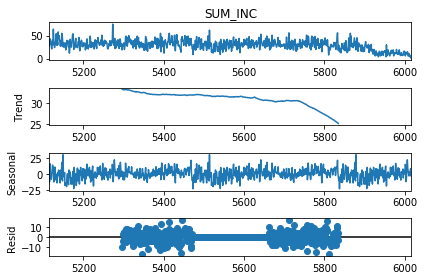

In [56]:
import statsmodels.api as sm
s=sm.tsa.seasonal_decompose(df_agg.SUM_INC,period=365)
s.plot()
pyplot.show()

Trend usually can tell us what our eyes might have already picked up from plotting the data on a less granular basis - is there a change in the overall "direction" of our data over time? If yes, then the data is most likely not stationary. 
<br> What does a stationary dataset even mean?
 - constant mean
 - constant variance
 - variance that is not time dependent
 
Eyeballing the data isn't always the best way to determine if a time series is stationary. We will perform an augmented Dickey-Fuller test.

What is an augmented Dickey-Fuller test? 

ADF Statistic: 1.461528
p-value: 0.997376
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


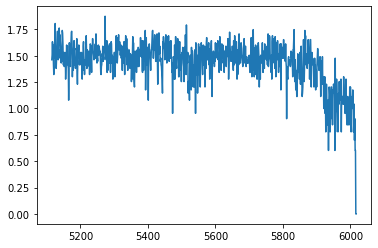

In [48]:
## Let's perform a test to see if the time series is stationary. 
## WE'll perform an augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
X = df_agg.SUM_INC
X = np.log10(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
pyplot.plot(X)
pyplot.show()

We can see that our statistic value of 0.85 is greater than the value of -3.431 at 1%.
This suggests that we fail to reject the null hypothesis with a significance level of less than 10% - really any significant level. <br>
We fail to reject the null hypothesis, so we fail to say the time series has a time independent structure. 
<br>
<br>
We have a choice now - we can try to transform the data using log or differencing transform to see if we are able to achieve a time independent structure, or we can move towards multivariate forecasting methods. Univariate forecasting methods, specifically ARIMA methods, rely on a foundational assumption that the time series is stationary.

##### What is ARIMA and what does it mean? 
Niwako had exercises and time for people to work on little pieces. 

action - how to do each of the methods. 
** auto arima -- sowmya
** VAR 
** random forest 

-- weigh the pros / cons of each

Can we look to see if there is a seasonality based on just fatality data? 
How do we make it more relateable / can we look at different subsets on the data to gain a better understanding? 
Incorporate more explanation in the methods. Many people will be just starting. 